In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import glob
import re

import matplotlib.cm as cm
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=cm.Dark2.colors)

In [8]:
# Function to load CSV and add columns from filename
def load_and_add_columns(file_path):
    # Load the CSV file
    df = pd.read_csv(file_path, names=["event_id", "T1_gen", "costheta_gen", "T1_reco", "costheta_reco", "e_gamma"])
    
    # Extract <Model>, <NME>, <Pressure>, and <binsize> from the filename
    match = re.match(pattern, file_path)
    
    if match:
        model, nme, pressure, binsize = match.groups()
        print(model,nme,pressure, binsize)
        df['Model'] = model
        df['nme'] = nme
        df['Pressure'] = pressure
        df['binsize'] = binsize
    else:
        print(f"Filename does not match the expected pattern: {file_path}")

    df["event_id"] =  df['event_id'].astype(int)
    df = df.sort_values(by='event_id')
    
    return df

In [9]:
files =  sorted(glob.glob("../files/reco2/*"))

dfs = []

print(files)

pattern = r'.*/([a-zA-Z0-9]+)_([a-zA-Z0-9]+)_([0-9]+bar)_([0-9]+mm)_smear_reco_merged\.txt'

for f in files:
    df = load_and_add_columns(f)
    dfs.append(df)

dfs = pd.concat(dfs)

display(dfs)

['../files/reco2/Leptoquark_SM_10bar_10mm_smear_reco_merged.txt', '../files/reco2/Leptoquark_SM_10bar_1mm_smear_reco_merged.txt', '../files/reco2/Leptoquark_SM_10bar_2mm_smear_reco_merged.txt', '../files/reco2/Leptoquark_SM_10bar_4mm_smear_reco_merged.txt', '../files/reco2/Leptoquark_SM_15bar_10mm_smear_reco_merged.txt', '../files/reco2/Leptoquark_SM_15bar_1mm_smear_reco_merged.txt', '../files/reco2/Leptoquark_SM_15bar_2mm_smear_reco_merged.txt', '../files/reco2/Leptoquark_SM_15bar_4mm_smear_reco_merged.txt', '../files/reco2/Leptoquark_SM_1bar_10mm_smear_reco_merged.txt', '../files/reco2/Leptoquark_SM_1bar_1mm_smear_reco_merged.txt', '../files/reco2/Leptoquark_SM_1bar_2mm_smear_reco_merged.txt', '../files/reco2/Leptoquark_SM_1bar_4mm_smear_reco_merged.txt', '../files/reco2/Leptoquark_SM_5bar_10mm_smear_reco_merged.txt', '../files/reco2/Leptoquark_SM_5bar_1mm_smear_reco_merged.txt', '../files/reco2/Leptoquark_SM_5bar_2mm_smear_reco_merged.txt', '../files/reco2/Leptoquark_SM_5bar_4mm_sme

,event_id,T1_gen,costheta_gen,T1_reco,costheta_reco,e_gamma,Model,nme,Pressure,binsize
1005,25,1.471389,0.563857,2.251138,-0.035037,0.139725,Leptoquark,SM,10bar,10mm
1006,26,1.822769,0.495602,1.818887,-0.143468,0.000000,Leptoquark,SM,10bar,10mm
1007,27,2.024553,-0.229500,2.016725,0.345789,0.000000,Leptoquark,SM,10bar,10mm
1008,28,2.340153,0.714166,2.340225,0.999348,0.343300,Leptoquark,SM,10bar,10mm
1009,29,1.280273,0.039594,1.531312,-0.064266,0.384150,Leptoquark,SM,10bar,10mm
...,...,...,...,...,...,...,...,...,...,...
99,10020,2.019712,0.670298,2.020300,0.403717,0.065700,mbb,SM,5bar,4mm
100,10021,1.356033,-0.877407,1.356162,-0.941898,0.029725,mbb,SM,5bar,4mm
101,10022,1.531105,-0.075736,1.984563,-0.045148,0.078175,mbb,SM,5bar,4mm
102,10023,1.313270,-0.202079,1.312025,-0.032926,0.000000,mbb,SM,5bar,4mm


In [10]:
def PlotHist(dfs, varname, model, nme, binsize, pressure, ax, norm, useLog, bins_, xlabel, ylabel, labelling):

    if (labelling == "binsize"):
        label = f"{model} {nme} {binsize}"
        title = pressure
    else:
        label = f"{model} {nme} {pressure}"
        title = binsize

    query = dfs[ (dfs.Model == model) & (dfs.nme == nme) & (dfs.Pressure == pressure) & (dfs.binsize == binsize) ]
    ax.hist(query[varname], bins = bins_, density=norm, log=useLog, histtype="step", label = label, linewidth=2);
    ax.set_xlabel(xlabel, fontsize=16)
    ax.set_ylabel(ylabel, fontsize=16)
    ax.legend()
    ax.set_title(title)

def PlotHistGen(dfs, varname, model, nme, binsize, pressure, ax, norm, useLog, bins_, xlabel, ylabel):
    query = dfs[ (dfs.Model == model) & (dfs.nme == nme) & (dfs.Pressure == pressure) & (dfs.binsize == binsize) ]
    ax.hist(query[varname], bins = bins_, density=norm, log=useLog, histtype="step", label = f"Gen", linewidth=2, color = "k");
    ax.legend()

def PlotHistDiff(dfs, varname,genvarname, model, nme, binsize, pressure, ax, norm, useLog, bins_, xlabel, ylabel):
    query = dfs[ (dfs.Model == model) & (dfs.nme == nme) & (dfs.Pressure == pressure) & (dfs.binsize == binsize) ]
    ax.hist(query[varname] - query[genvarname] , bins = bins_, density=norm, log=useLog, histtype="step", label = f"{model} {nme} {binsize}", linewidth=2);
    ax.set_xlabel(xlabel, fontsize=16)
    ax.set_ylabel(ylabel, fontsize=16)
    ax.legend()
    ax.set_title(pressure)
    

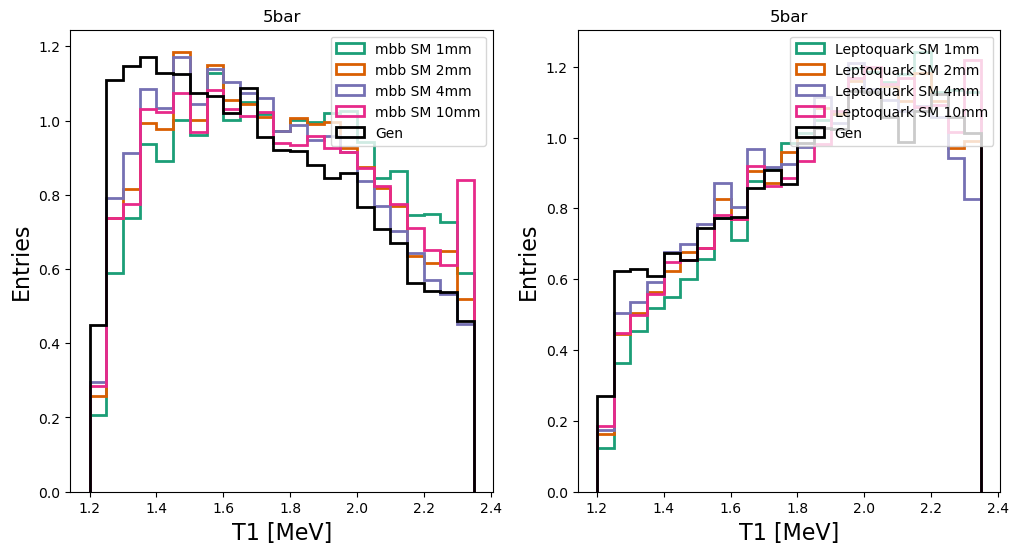

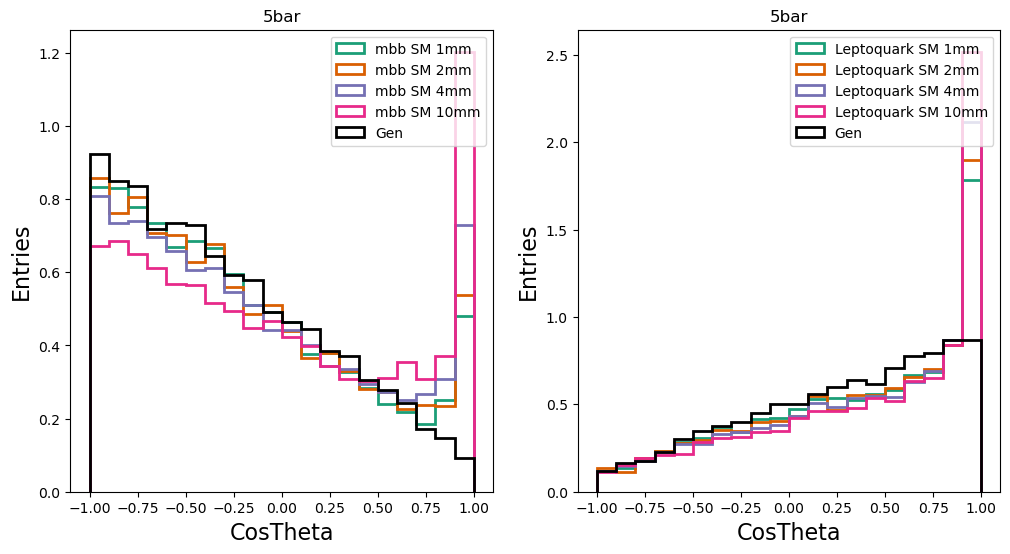

In [11]:
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(12, 6))
useLog=False
norm=True

pressure = "5bar"

for bs in ["1mm", "2mm", "4mm", "10mm"]:
    PlotHist(dfs,    "T1_reco", "mbb", "SM", bs,pressure, ax1, norm, useLog, np.arange(1.2,2.4,0.05), "T1 [MeV]", "Entries", "binsize")
    PlotHist(dfs,    "T1_reco", "Leptoquark", "SM", bs,pressure, ax2, norm, useLog, np.arange(1.2,2.4,0.05), "T1 [MeV]", "Entries", "binsize")

PlotHistGen(dfs, "T1_gen",  "mbb", "SM", "1mm",pressure, ax1, norm, useLog, np.arange(1.2,2.4,0.05), "T1 [MeV]", "Entries")
PlotHistGen(dfs, "T1_gen",  "Leptoquark", "SM", "1mm",pressure, ax2, norm, useLog, np.arange(1.2,2.4,0.05), "T1 [MeV]", "Entries")

fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(12, 6))
for bs in ["1mm", "2mm", "4mm", "10mm"]:
    PlotHist(dfs,    "costheta_reco", "mbb", "SM", bs,pressure, ax1, norm, useLog, np.arange(-1,1.1,0.1), "CosTheta", "Entries", "binsize")
    PlotHist(dfs,    "costheta_reco", "Leptoquark", "SM", bs,pressure, ax2, norm, useLog, np.arange(-1,1.1,0.1), "CosTheta", "Entries", "binsize")

PlotHistGen(dfs, "costheta_gen", "mbb", "SM",  "1mm",pressure, ax1, norm, useLog, np.arange(-1,1.1,0.1), "CosTheta", "Entries")
PlotHistGen(dfs, "costheta_gen",  "Leptoquark", "SM", "1mm",pressure, ax2, norm, useLog, np.arange(-1,1.1,0.1), "CosTheta", "Entries")

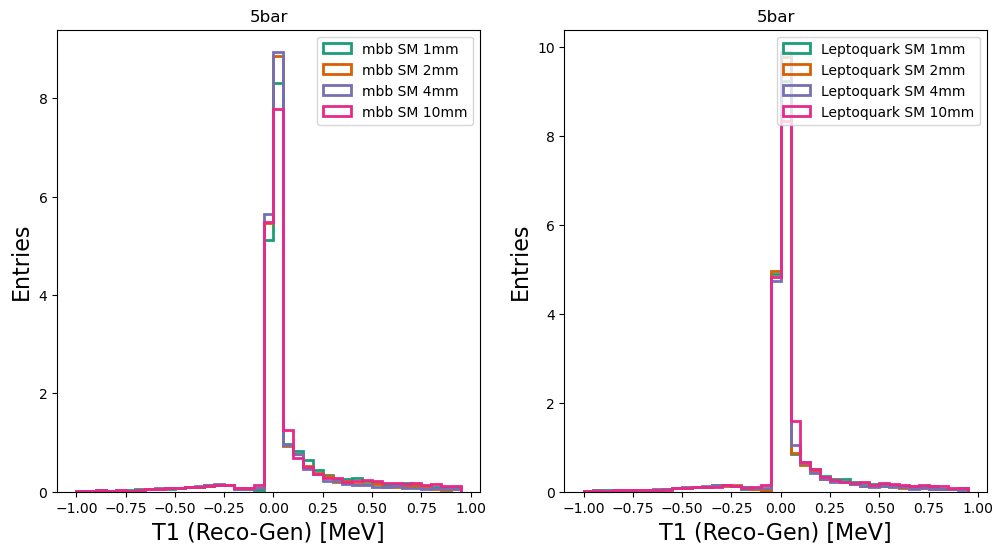

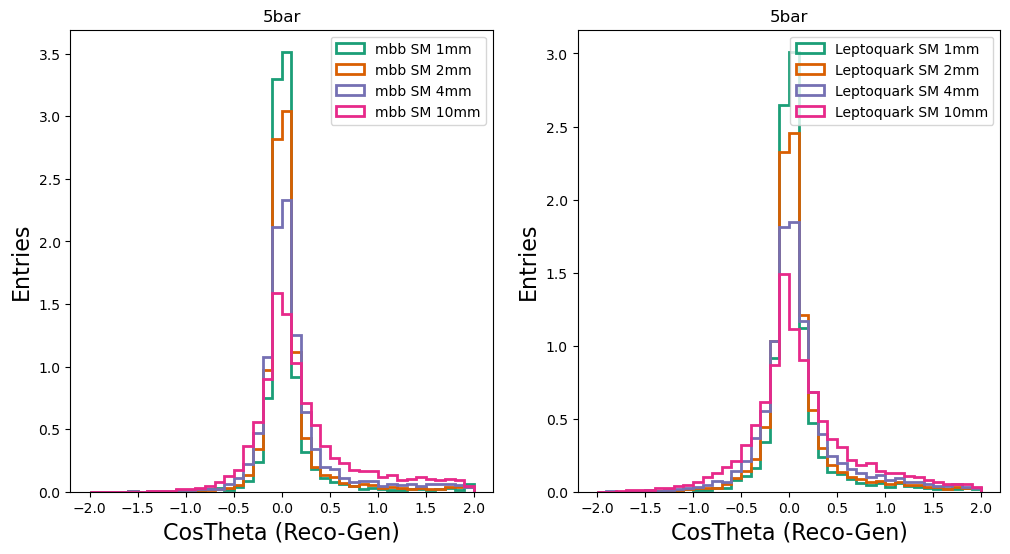

In [14]:
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(12, 6))
useLog=False
norm=True


for bs in ["1mm", "2mm", "4mm", "10mm"]:
    PlotHistDiff(dfs,    "T1_reco", "T1_gen", "mbb", "SM", bs, pressure, ax1, norm, useLog,  np.arange(-1,1,0.05), "T1 (Reco-Gen) [MeV]", "Entries")
    PlotHistDiff(dfs,    "T1_reco", "T1_gen", "Leptoquark", "SM", bs, pressure, ax2, norm, useLog, np.arange(-1,1,0.05), "T1 (Reco-Gen) [MeV]", "Entries")


fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(12, 6))
for bs in ["1mm", "2mm", "4mm", "10mm"]:
    PlotHistDiff(dfs,    "costheta_reco","costheta_gen", "mbb", "SM", bs, pressure, ax1, norm, useLog, np.arange(-2,2.1,0.1), "CosTheta (Reco-Gen)", "Entries")
    PlotHistDiff(dfs,    "costheta_reco","costheta_gen", "Leptoquark", "SM", bs, pressure, ax2, norm, useLog,  np.arange(-2,2.1,0.1), "CosTheta (Reco-Gen)", "Entries")


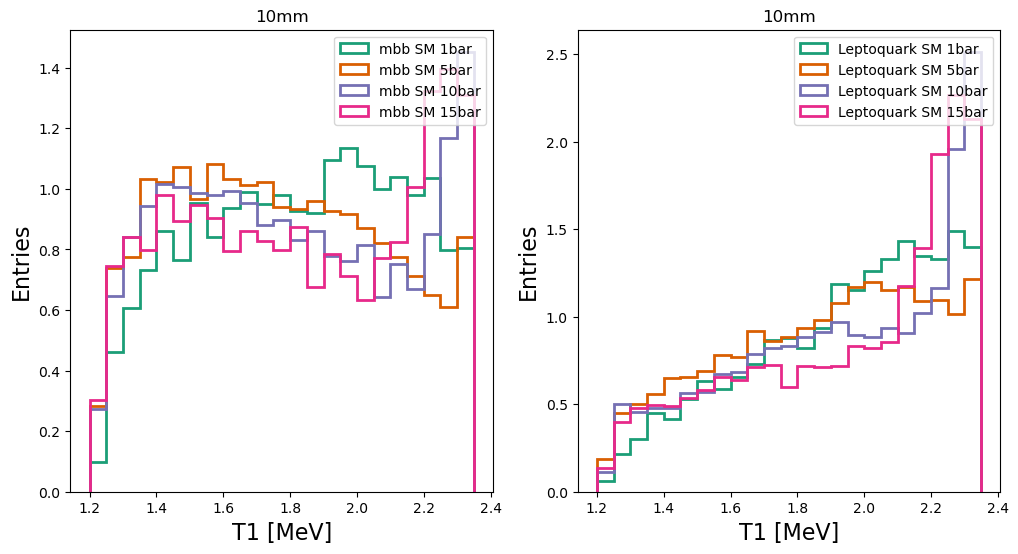

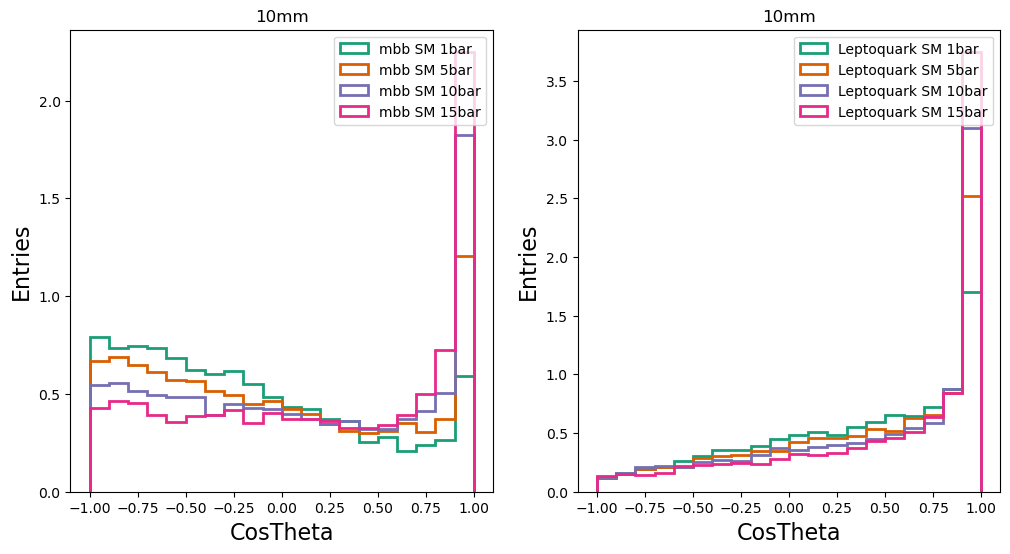

In [18]:
# Compare pressures
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(12, 6))
useLog=False
norm=True

binsize = "10mm"

for p in ["1bar", "5bar", "10bar", "15bar"]:
    PlotHist(dfs,    "T1_reco", "mbb", "SM", binsize, p, ax1, norm, useLog, np.arange(1.2,2.4,0.05), "T1 [MeV]", "Entries", "pressure")
    PlotHist(dfs,    "T1_reco", "Leptoquark", "SM", binsize, p, ax2, norm, useLog, np.arange(1.2,2.4,0.05), "T1 [MeV]", "Entries", "pressure")


fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(12, 6))

for p in ["1bar", "5bar", "10bar", "15bar"]:
    PlotHist(dfs,    "costheta_reco", "mbb", "SM", binsize,p, ax1, norm, useLog, np.arange(-1,1.1,0.1), "CosTheta", "Entries", "pressure")
    PlotHist(dfs,    "costheta_reco", "Leptoquark", "SM", binsize,p, ax2, norm, useLog, np.arange(-1,1.1,0.1), "CosTheta", "Entries", "pressure")
